In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 42.8MB/s 


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
folder = 'monet'
file = 'urls_monet.csv'

In [0]:
path = Path('data/paintings')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

[PosixPath('data/paintings/urls_monet.csv'),
 PosixPath('data/paintings/urls_manet.csv'),
 PosixPath('data/paintings/monet'),
 PosixPath('data/paintings/manet')]

In [0]:
classes = ['monet','manet']

In [13]:
download_images(path/file, dest, max_pics=200)

In [14]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

monet


manet


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['manet', 'monet']

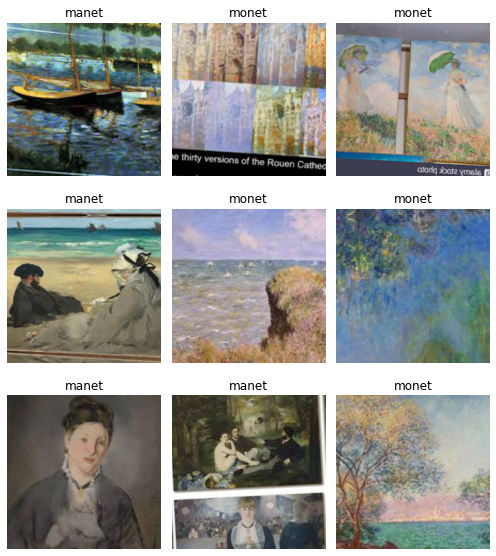

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [50]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['manet', 'monet'], 2, 256, 64)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [52]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.927693,1.125767,0.218750,00:03
1,0.624427,0.500715,0.109375,00:03
2,0.488933,0.564466,0.093750,00:03
3,0.431003,0.590819,0.109375,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


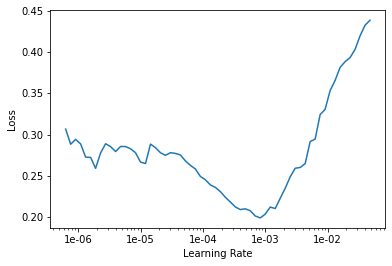

In [59]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.447152,3.126030,0.343750,00:03
1,0.411610,1.065945,0.125000,00:03


In [0]:
learn.save('stage-2')

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
img = open_image(path/'monet'/'00000000.jpg')

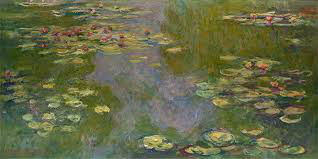

In [67]:
img

In [0]:
learn = load_learner(path)

In [69]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category monet